In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
COLUMNS = [
    'id', 'diagnosis',
    'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
    'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
    'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'
]

data = pd.read_csv('data.csv', sep=',', names=COLUMNS)
if data.shape[1] != len(COLUMNS):
    raise ValueError(f"Expected {len(COLUMNS)} columns, but got {data.shape[1]}")

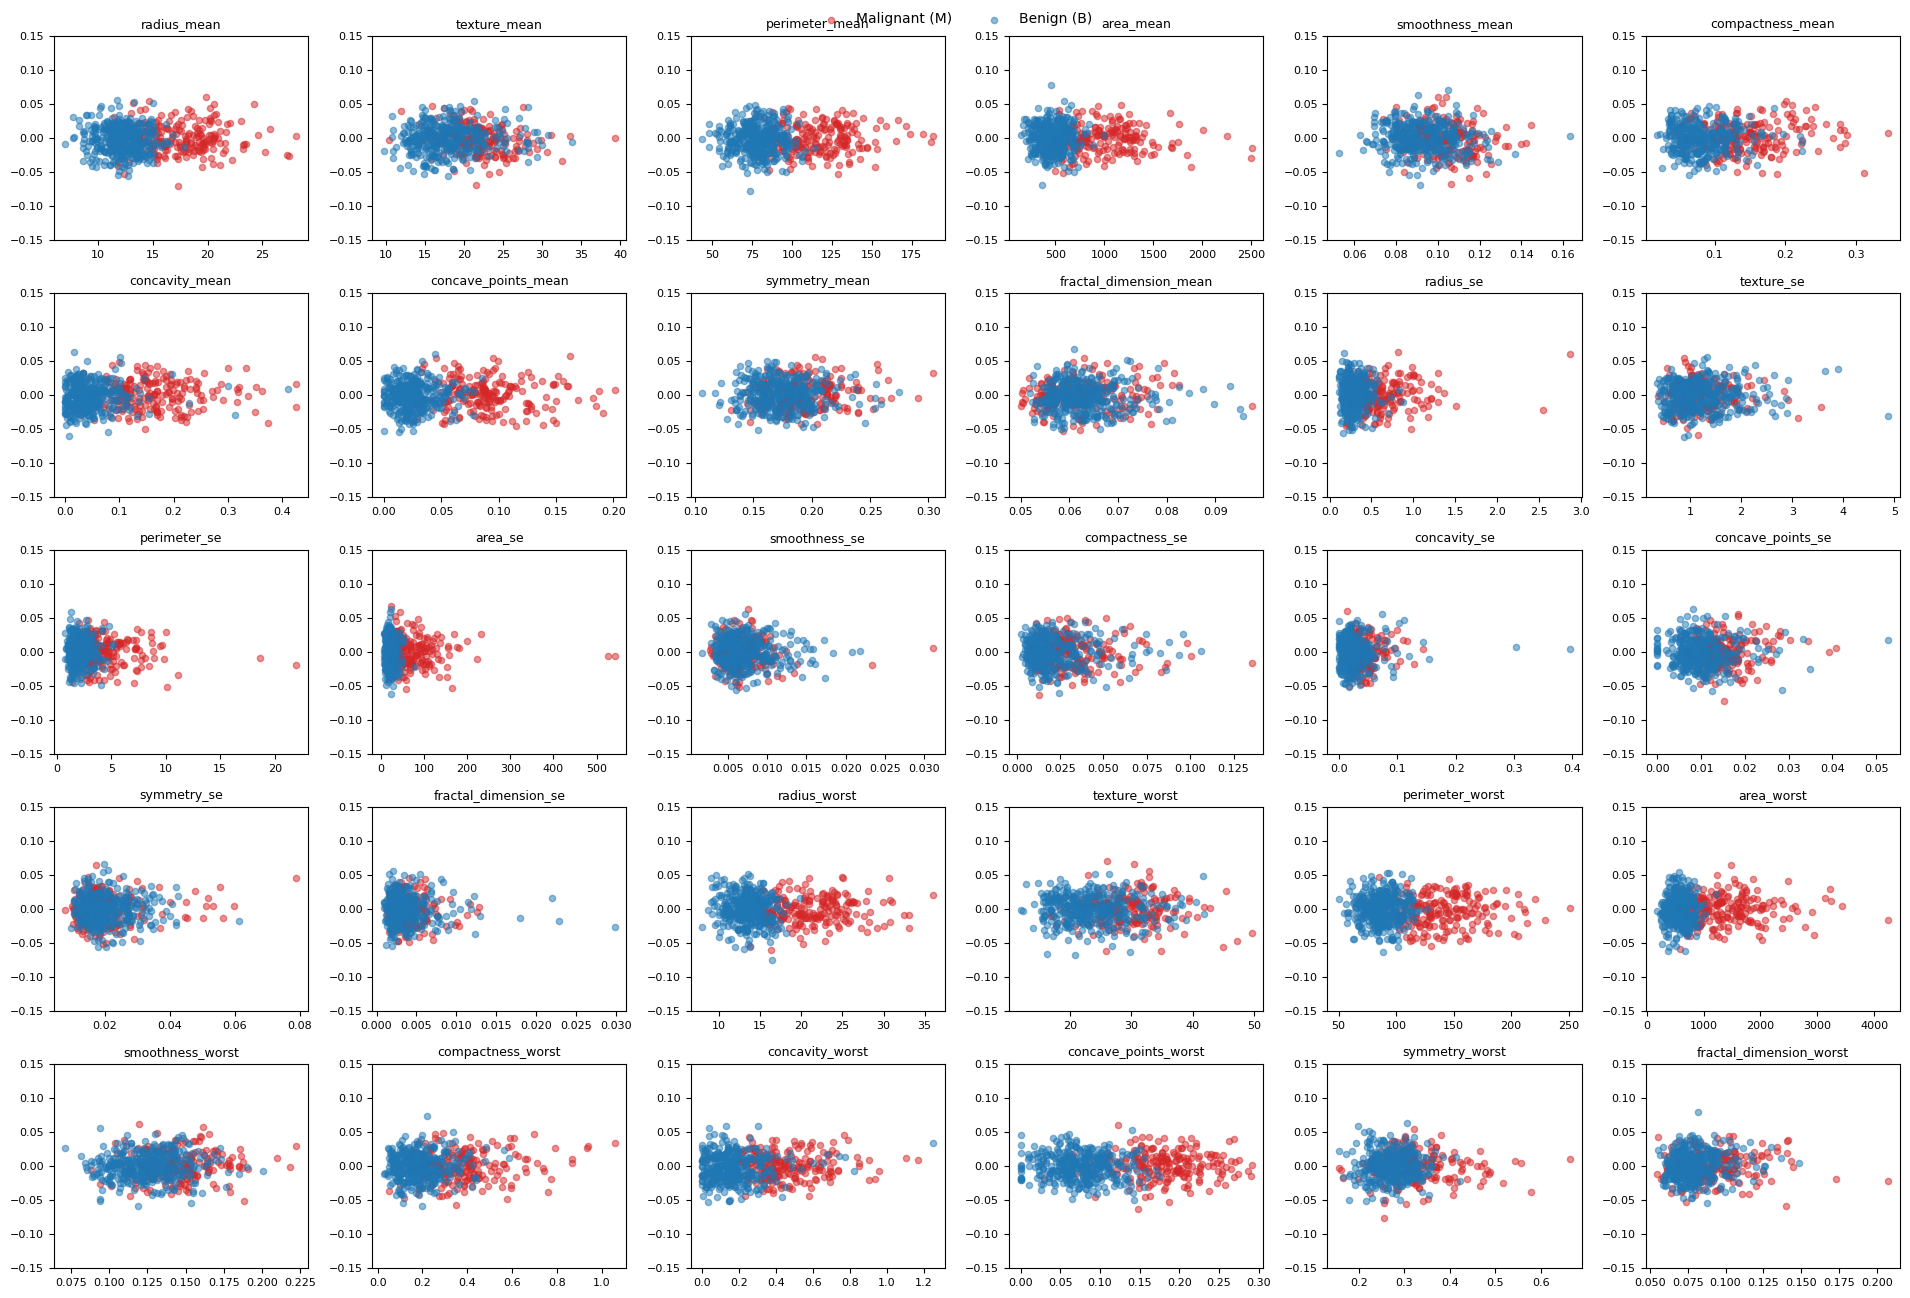

In [3]:
if data is not None:
    try:
        features = COLUMNS[2:]  # toutes les features numériques (30)
        n_features = len(features)
        n_cols = 6
        n_rows = math.ceil(n_features / n_cols)

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2, n_rows*2.6), sharex=False, sharey=False)
        axes = axes.flatten()

        m_mask = data['diagnosis'] == 'M'
        b_mask = data['diagnosis'] == 'B'

        for i, col in enumerate(features):
            ax = axes[i]
            # Scatter plot au lieu d'histogramme
            ax.scatter(data.loc[m_mask, col].dropna(), np.random.normal(0, 0.02, m_mask.sum()), 
                      alpha=0.5, s=20, label='Malignant (M)', color='tab:red')
            ax.scatter(data.loc[b_mask, col].dropna(), np.random.normal(0, 0.02, b_mask.sum()), 
                      alpha=0.5, s=20, label='Benign (B)', color='tab:blue')
            ax.set_title(col, fontsize=9)
            ax.tick_params(axis='both', labelsize=8)
            ax.set_ylim(-0.15, 0.15)  # zoom sur l'axe Y

        # Désactiver les axes inutilisés si besoin
        for j in range(n_features, len(axes)):
            axes[j].axis('off')

        # Légende globale
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False)

        fig.tight_layout()
        plt.show()
    except Exception as e:
        print(f"An error occurred while visualizing the data: {e}")

In [ ]:
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")



Train set shape: (455, 30), Test set shape: (114, 30)
Train labels distribution:
 10     1
170    0
407    0
430    1
27     1
      ..
37     0
415    0
458    0
476    0
335    1
Name: diagnosis, Length: 455, dtype: int64


In [17]:
# Reconvertir en pandas
X_train_df = pd.DataFrame(X_train, columns=COLUMNS[2:])  # 30 features
X_test_df = pd.DataFrame(X_test, columns=COLUMNS[2:])

y_train_df = pd.DataFrame(y_train.values, columns=['diagnosis'])
y_test_df = pd.DataFrame(y_test.values, columns=['diagnosis'])

# Concaténer diagnosis + features
data_train = pd.concat([y_train_df, X_train_df], axis=1)
data_test = pd.concat([y_test_df, X_test_df], axis=1)

print(f"data_train shape: {data_train.shape}")
print(f"data_test shape: {data_test.shape}")
print(data_train.head())

data_train shape: (455, 31)
data_test shape: (114, 31)
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     0.518559      0.891826        0.424632   0.383925   
1          0    -0.516364     -1.639710       -0.541349  -0.542961   
2          0    -0.368118      0.455515       -0.388250  -0.402970   
3          1     0.205285      0.726168        0.400330   0.070612   
4          1     1.243005      0.194195        1.210377   1.206652   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0        -0.974744         -0.689772       -0.688586            -0.398175   
1         0.476219         -0.631834       -0.604281            -0.303075   
2        -1.432979         -0.383927       -0.342175            -0.765459   
3         0.243253          2.203585        2.256094             1.213233   
4        -0.111442          0.051348        0.732962             0.713767   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter

In [18]:
data_train.to_csv('train_data.csv', index=False)
data_test.to_csv('test_data.csv', index=False)

print("Fichiers sauvegardés: train_data.csv, test_data.csv")

Fichiers sauvegardés: train_data.csv, test_data.csv
